In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'darkgrid')

# Scatterplot

Relating variables with scatter plots

In [2]:
# sns.get_data_home() # path where seaborn caches loaded datasets
tips = sns.load_dataset(name = 'tips', data_home = 'data/')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


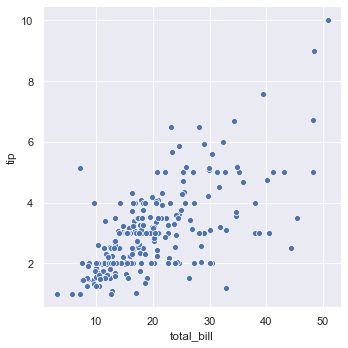

In [3]:

sns.relplot(x = 'total_bill', y = 'tip', data = tips, kind = 'scatter')

While the points are plotted in two dimensions, another dimension can be added to the plot by coloring the points according to a third variable. In seaborn, this is referred to as using a “hue semantic”, because the color of the point gains meaning

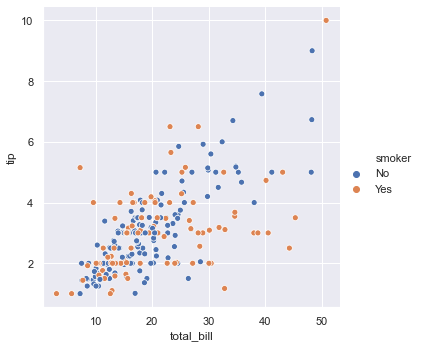

In [4]:
sns.relplot(x = 'total_bill', y = 'tip', data = tips, hue = 'smoker', kind = 'scatter')

To emphasize the difference between the classes, and to improve accessibility, you can use a different marker style for each class

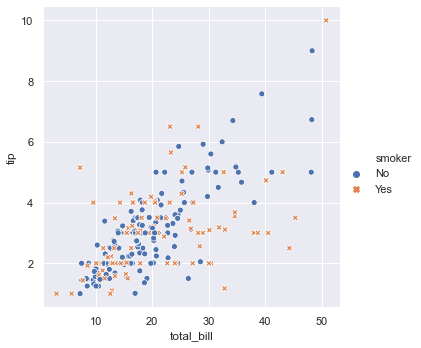

In [5]:
sns.relplot(x = 'total_bill', y = 'tip', kind = 'scatter', hue = 'smoker', style = 'smoker', data = tips)

It’s also possible to represent four variables by changing the hue and style of each point independently. But this should be done carefully, because the eye is much less sensitive to shape than to color:

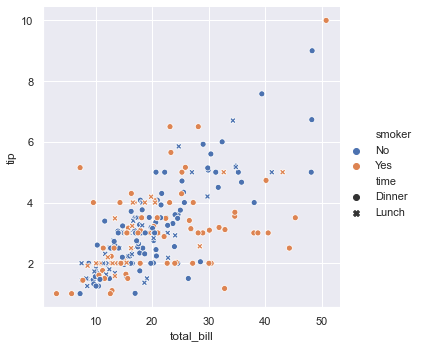

In [15]:
sns.relplot(x = 'total_bill', y = 'tip', kind = 'scatter', hue = 'smoker', style = 'time', data = tips)

In the examples above, the hue semantic was categorical, so the default qualitative palette was applied. If the hue semantic is numeric (specifically, if it can be cast to float), the default coloring switches to a sequential palette

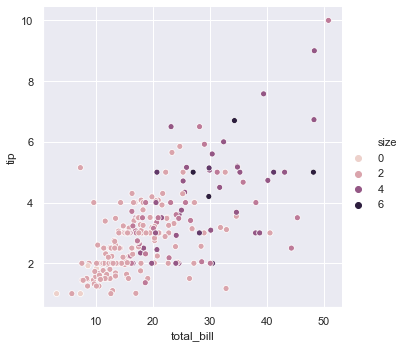

In [16]:
sns.relplot(x = 'total_bill', y = 'tip', hue = 'size', data = tips)

In both cases, you can customize the color palette. There are many options for doing so. Here, we customize a sequential palette using the string interface to cubehelix_palette()

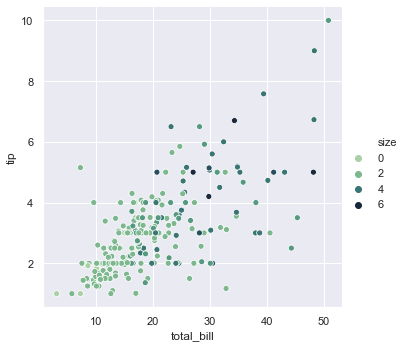

In [38]:
sns.relplot(x = 'total_bill', y = 'tip', hue = 'size', palette = 'ch:r=-.5, l = .75', data = tips)


The third kind of semantic variable changes the size of each point

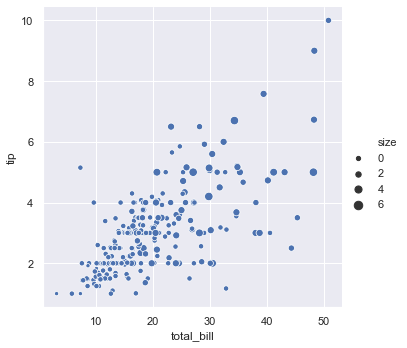

In [40]:
sns.relplot(x = 'total_bill', y = 'tip', size = 'size', data = tips, kind = 'scatter')

Unlike with matplotlib.pyplot.scatter(), the literal value of the variable is not used to pick the area of the point. Instead, the range of values in data units is normalized into a range in area units. This range can be customized

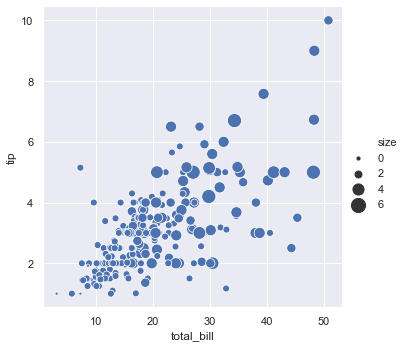

In [45]:
sns.relplot(x = 'total_bill', y = 'tip', size = 'size', 
            sizes = (10,200), data = tips, kind = 'scatter')



# Line plot

Emphasizing continuity with line plots

Scatter plots are highly effective, but there is no universally optimal type of visualisation. Instead, the visual representation should be adapted for the specifics of the dataset and to the question you are trying to answer with the plot.

With some datasets, you may want to understand changes in one variable as a function of time, or a similarly continuous variable. In this situation, a good choice is to draw a line plot. In seaborn, this can be accomplished by the lineplot() function, either directly or with relplot() by setting kind="line"

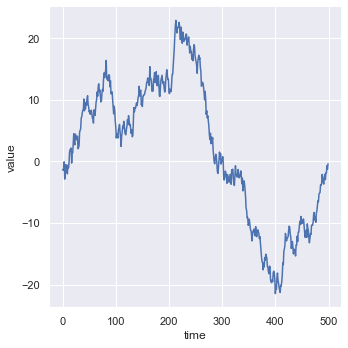

In [53]:
df = pd.DataFrame({'time': np.arange(500),
                   'value': np.random.randn(500).cumsum()})
g = sns.relplot(x = 'time', y = 'value', kind = 'line', data = df)
#g.fig.autofmt_xdate()



Because lineplot() assumes that you are most often trying to draw y as a function of x, the default behavior is to sort the data by the x values before plotting. However, this can be disabled

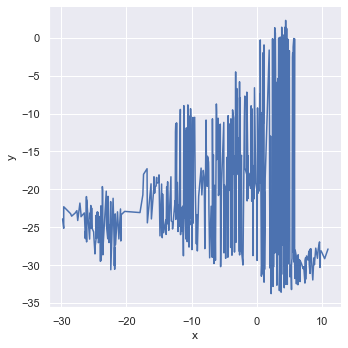

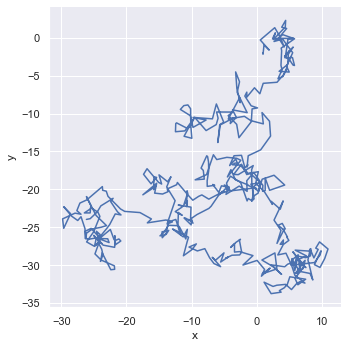

In [56]:
df = pd.DataFrame(np.random.randn(500,2).cumsum(axis=0), columns = ['x', 'y'])
sns.relplot(x = 'x', y = 'y', sort = True, kind = 'line', data = df)
sns.relplot(x = 'x', y = 'y', sort = False, kind = 'line', data = df)

### Aggregation and representing uncertainty

More complex datasets will have multiple measurements for the same value of the x variable. The default behavior in seaborn is to aggregate the multiple measurements at each x value by plotting the mean and the 95% confidence interval around the mean

In [2]:
fmri = sns.load_dataset('fmri', data_home='data/')
print(fmri.head())
#print(fmri.describe())

  subject  timepoint event    region    signal
0     s13         18  stim  parietal -0.017552
1      s5         14  stim  parietal -0.080883
2     s12         18  stim  parietal -0.081033
3     s11         18  stim  parietal -0.046134
4     s10         18  stim  parietal -0.037970


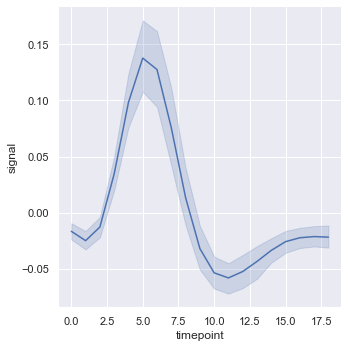

In [20]:
sns.relplot(x = 'timepoint', y = 'signal', kind = 'line', data = fmri)

The confidence intervals are computed using bootstrapping, which can be time-intensive for larger datasets. It’s therefore possible to disable them

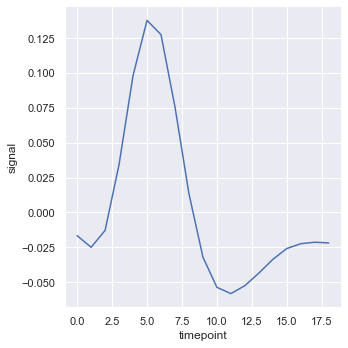

In [21]:
sns.relplot(x = 'timepoint', y = 'signal', ci = None, kind = 'line', data = fmri)

Another good option, especially with larger data, is to represent the spread of the distribution at each timepoint by plotting the standard deviation instead of a confidence interval

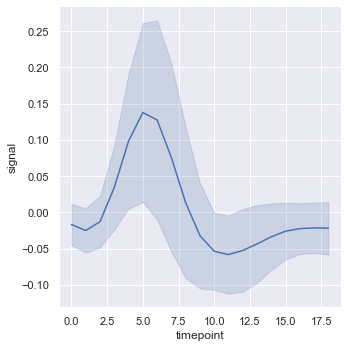

In [22]:
sns.relplot(x = 'timepoint', y = 'signal', ci = 'sd', kind = 'line', data = fmri)

To turn off aggregation altogether, set the estimator parameter to None This might produce a strange effect when the data have multiple observations at each point.

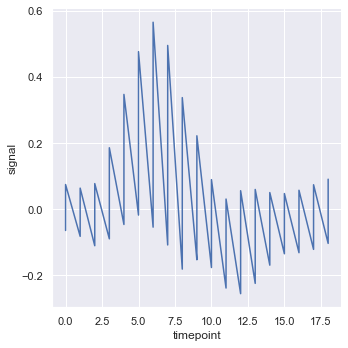

In [23]:
sns.relplot(x = 'timepoint', y = 'signal', estimator = None, kind = 'line', data = fmri)

### Plotting subsets of data with semantic mappings

The lineplot() function has the same flexibility as scatterplot(): it can show up to three additional variables by modifying the hue, size, and style of the plot elements. It does so using the same API as scatterplot(), meaning that we don’t need to stop and think about the parameters that control the look of lines vs. points in matplotlib.

Using semantics in lineplot() will also determine how the data get aggregated. For example, adding a hue semantic with two levels splits the plot into two lines and error bands, coloring each to indicate which subset of the data they correspond to.

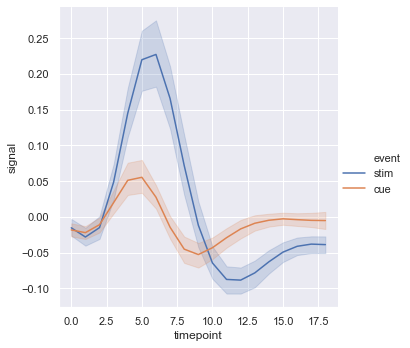

In [25]:
sns.relplot(x = 'timepoint', y = 'signal', hue = 'event', kind = 'line', data = fmri)

Adding a style semantic to a line plot changes the pattern of dashes in the line by default:

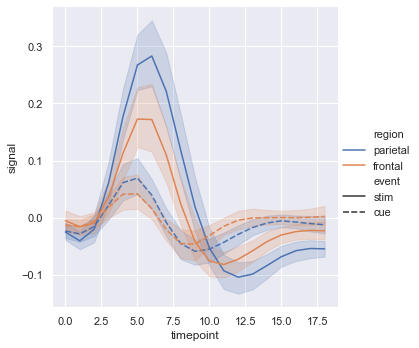

In [28]:
sns.relplot(x = 'timepoint', y = 'signal', hue = 'region', style = 'event', kind = 'line', data = fmri)

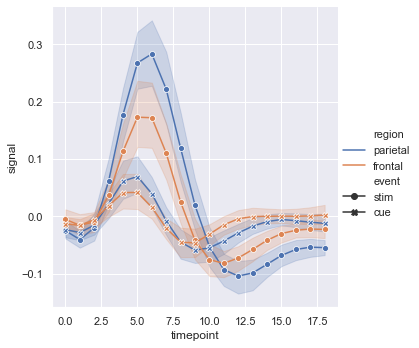

In [5]:
sns.relplot(x = 'timepoint', y = 'signal', hue = 'region', style = 'event',  dashes = False, markers = True, kind = 'line', data = fmri)



When you are working with repeated measures data (that is, you have units that were sampled multiple times), you can also plot each sampling unit separately without distinguishing them through semantics. This avoids cluttering the legend

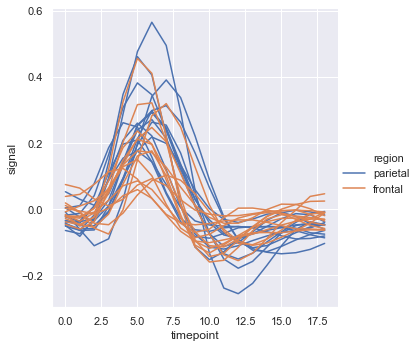

In [40]:
fmri['event'].unique()
sns.relplot(x = 'timepoint', y = 'signal', hue = 'region',
            kind = 'line', estimator = None, 
            units = 'subject', data = fmri.loc[fmri['event'] == 'stim', :])

The default colormap and handling of the legend in lineplot() also depends on whether the hue semantic is categorical or numeric

  align choice  time  coherence  firing_rate
0  dots     T1   -80        0.0    33.189967
1  dots     T1   -80        3.2    31.691726
2  dots     T1   -80        6.4    34.279840
3  dots     T1   -80       12.8    32.631874
4  dots     T1   -80       25.6    35.060487


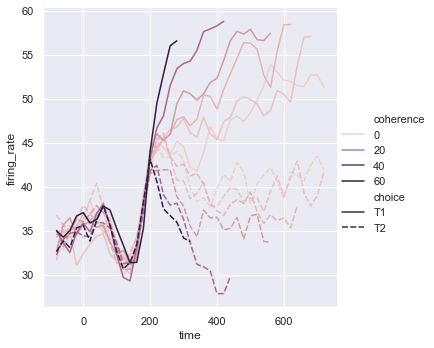

In [56]:
dots = sns.load_dataset(name = 'dots', data_home='data/')
print(dots.head())
#dots['align'].unique()
dots = dots.loc[dots['align'] == 'dots', :]
sns.relplot(x = 'time', y = 'firing_rate', kind = 'line', 
            hue = 'coherence', style = 'choice', estimator = None, data = dots)

It may happen that, even though the hue variable is numeric, it is poorly represented by a linear color scale. That’s the case here, where the levels of the hue variable are logarithmically scaled. You can provide specific color values for each line by passing a list or dictionary:

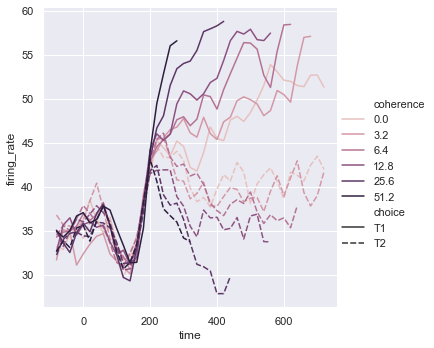

In [79]:
palette = sns.cubehelix_palette(light = 0.8, n_colors = 6)
sns.relplot(x = 'time', y = 'firing_rate',
            hue = 'coherence', style = 'choice',
            palette = palette,
            kind = 'line', data = dots)
#print(palette)

Or you can alter how the colormap is normalized

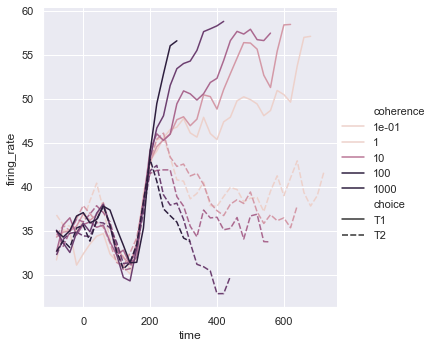

In [84]:
from matplotlib.colors import LogNorm
palette = sns.cubehelix_palette(light = 0.7, n_colors = 6)
sns.relplot(x = 'time', y = 'firing_rate',
            kind = 'line', hue = 'coherence', 
            style = 'choice', 
            hue_norm = LogNorm(), data = dots)

The third semantic, size, changes the width of the lines

count    394.000000
mean      12.621320
std       15.254508
min        0.000000
25%        3.200000
50%        6.400000
75%       12.800000
max       51.200000
Name: coherence, dtype: float64

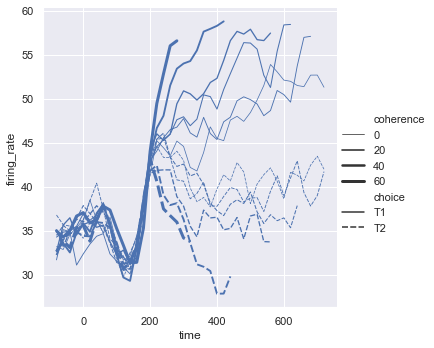

In [86]:
sns.relplot(x = 'time', y = 'firing_rate',
            size = 'coherence', style = 'choice',
            kind = 'line', data = dots
           )
dots['coherence'].describe()

While the size variable will typically be numeric, it’s also possible to map a categorical variable with the width of the lines. Be cautious when doing so, because it will be difficult to distinguish much more than “thick” vs “thin” lines. However, dashes can be hard to perceive when lines have high-frequency variability, so using different widths may be more effective in that case:

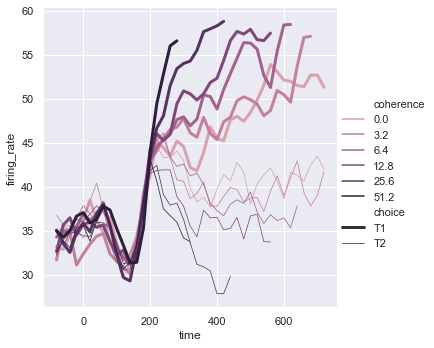

In [87]:
sns.relplot(x = 'time', y = 'firing_rate',
            hue = 'coherence', size = 'choice',
            palette = palette, kind = 'line', data = dots
           )

### Plotting with date data

Line plots are often used to visualize data associated with real dates and times. These functions pass the data down in their original format to the underlying matplotlib functions, and so they can take advantage of matplotlib’s ability to format dates in tick labels. But all of that formatting will have to take place at the matplotlib layer, and you should refer to the matplotlib documentation to see how it works:

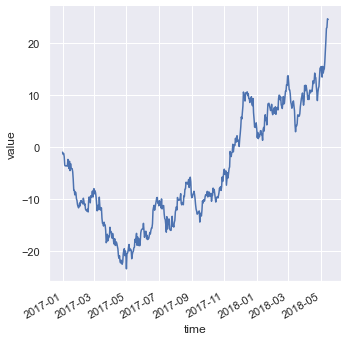

In [89]:
df = pd.DataFrame({'time': pd.date_range('2017-1-1', periods = 500),
                   'value': np.random.randn(500).cumsum()})
g = sns.relplot(x = 'time', y = 'value', kind = 'line', data = df)
g.fig.autofmt_xdate()

# Showing multiple relationships with facets

We’ve emphasized in this tutorial that, while these functions can show several semantic variables at once, it’s not always effective to do so. But what about when you do want to understand how a relationship between two variables depends on more than one other variable?

The best approach may be to make more than one plot. Because relplot() is based on the FacetGrid, this is easy to do. To show the influence of an additional variable, instead of assigning it to one of the semantic roles in the plot, use it to “facet” the visualization. This means that you make multiple axes and plot subsets of the data on each of them:

In [6]:
sns.relplot(x = 'total_bill', y = 'tip', hue = 'smoker',
            col = 'time', kind = 'scatter', data = tips)

NameError: name 'tips' is not defined

You can also show the influence two variables this way: one by faceting on the columns and one by faceting on the rows. As you start adding more variables to the grid, you may want to decrease the figure size. Remember that the size FacetGrid is parameterized by the height and aspect ratio of each facet

array(['stim', 'cue'], dtype=object)

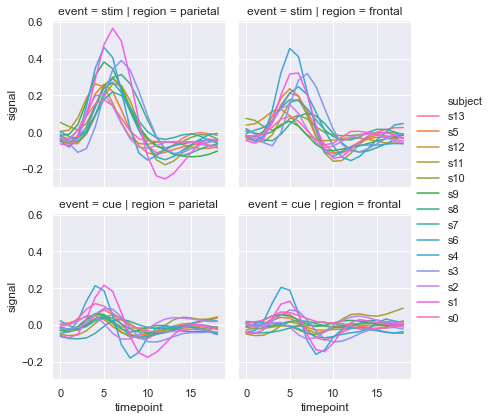

In [101]:
sns.relplot(x = 'timepoint', y = 'signal',
            hue = 'subject', kind = 'line',
            col = 'region', row = 'event',
            height = 3, estimator = None, data = fmri
           )
fmri['event'].unique()

When you want to examine effects across many levels of a variable, it can be a good idea to facet that variable on the columns and then “wrap” the facets into the rows

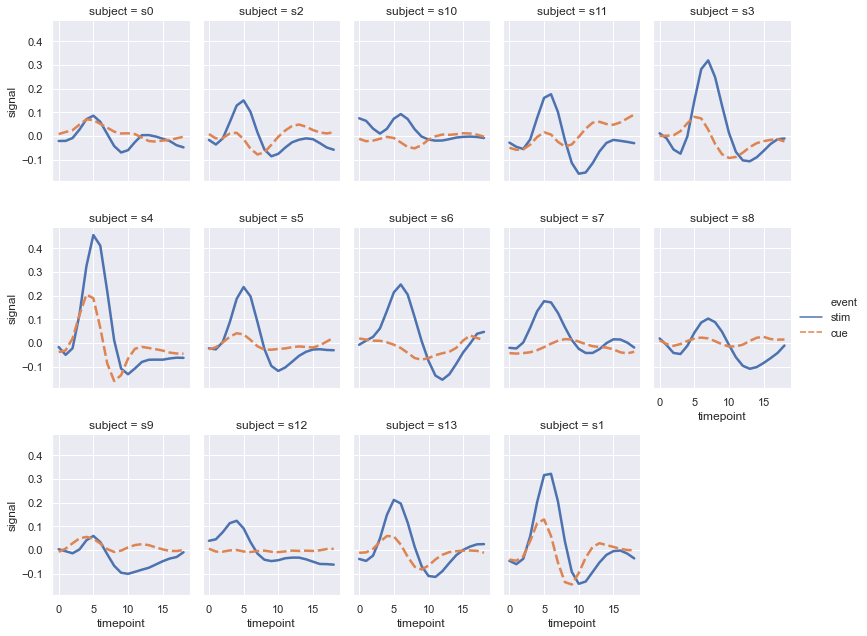

In [110]:
sns.relplot(x = 'timepoint', y = 'signal', 
            hue = 'event', style = 'event',
            col = 'subject', col_wrap=5,
            height = 3, aspect = .75, linewidth = 2.5,
            kind = 'line',
            data = fmri.loc[fmri['region'] == 'frontal', ]
           )

These visualizations, which are often called “lattice” plots or “small-multiples”, are very effective because they present the data in a format that makes it easy for the eye to detect both overall patterns and deviations from those patterns. While you should make use of the flexibility afforded by scatterplot() and relplot(), always try to keep in mind that several simple plots are usually more effective than one complex plot.

# Color palette with cubehelix_palette()

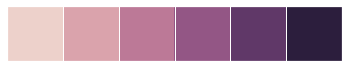

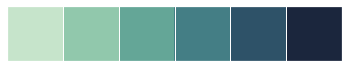

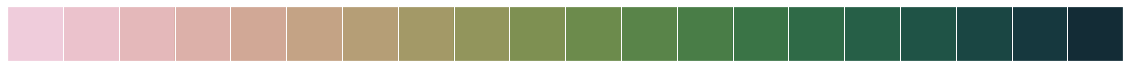

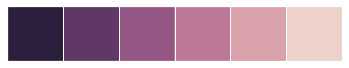

In [117]:
# https://seaborn.pydata.org/generated/seaborn.cubehelix_palette.html#seaborn.cubehelix_palette
sns.palplot(sns.cubehelix_palette())
sns.palplot(sns.cubehelix_palette(rot = -.4))
sns.palplot(sns.cubehelix_palette(n_colors = 20, start = 0, rot = -.9))
sns.palplot(sns.cubehelix_palette(reverse = True))

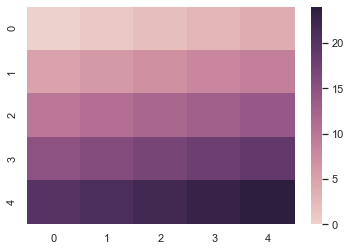

In [34]:
# Generate a colormap object
x = np.arange(25).reshape(5,5)
cmap = sns.cubehelix_palette(as_cmap = True)
ax = sns.heatmap(x, cmap = cmap)

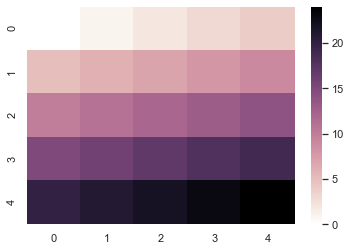

In [35]:
cmap = sns.cubehelix_palette(dark = 0, light = 1, as_cmap = True)
ax = sns.heatmap(x, cmap = cmap)